In [1]:
# import psycopg2

# con = psycopg2.connect(host = '122.154.109.207',
#                      database =  'mixer_dw', port='5432',
#                       user = 'riseplus',
#                       password = 'riseplus')

# con = psycopg2.connect(host = '192.168.142.226', port = '5432',database= 'mixer_dw',user = 'riseplus',password =  'riseplus')

In [2]:
import pandas as pd

import calendar
import datetime

In [3]:
# import data
data = pd.read_csv('data-1586242465704.csv',sep=",")
data

In [4]:
# sorting date of data by generation time
data.sort_values(by=['generation_time'], inplace=True)
data

In [5]:
# remove duplicte values by generation_time  ลบค่าซ้ำ
# data.drop_duplicates(subset ="generation_time", keep = False, inplace = True)
data.drop_duplicates(inplace = True)
data.head(len(data))

,name,eng_value,generation_time
2071,TTH15A,*NO VAL*,575217488648906250
2268,TTH15A,18.259109,1579579416652812500
3406,TTH15A,18.25910931174089,1579579416652812500
3408,TTH15A,18.25910931174089,1579579544652812500
3471,TTH15A,18.259109,1579579544652812500
...,...,...,...
4182,TTH15A,20.483871,1585578448656718750
4102,TTH15A,20.483870967741936,1585578456656718750
4191,TTH15A,20.483871,1585578456656718750
4192,TTH15A,20.32258064516129,1585584304656718750


In [6]:
len(data)

3602

In [7]:
# convert eng_value str type to float type
data['eng_value'] = pd.to_numeric(data['eng_value'], errors='coerce')

# convert generation_time str type to float type
data['generation_time'] = pd.to_numeric(data['generation_time'], errors='coerce')

# remove nan
data.dropna(inplace = True)
data

,name,eng_value,generation_time
2268,TTH15A,18.259109,1579579416652812500
3406,TTH15A,18.259109,1579579416652812500
3408,TTH15A,18.259109,1579579544652812500
3471,TTH15A,18.259109,1579579544652812500
2837,TTH15A,18.259109,1579581464648906250
...,...,...,...
4182,TTH15A,20.483871,1585578448656718750
4102,TTH15A,20.483871,1585578456656718750
4191,TTH15A,20.483871,1585578456656718750
4192,TTH15A,20.322581,1585584304656718750


In [8]:
# summarize nan
data.isnull().sum()

name               0
eng_value          0
generation_time    0
dtype: int64

In [9]:
# reset index
data.reset_index(inplace=True)

In [10]:
data.head(33)

,index,name,eng_value,generation_time
0,2268,TTH15A,18.259109,1579579416652812500
1,3406,TTH15A,18.259109,1579579416652812500
2,3408,TTH15A,18.259109,1579579544652812500
3,3471,TTH15A,18.259109,1579579544652812500
4,2837,TTH15A,18.259109,1579581464648906250
5,2723,TTH15A,18.259109,1579581464648906250
6,353,TTH15A,18.259109,1579582104652812500
7,253,TTH15A,18.259109,1579582104652812500
8,766,TTH15A,18.218623,1579585432652812500
9,1267,TTH15A,18.218623,1579585432652812500


In [11]:
# convert julian date to UTC
import julian
import datetime

data['UTC']=0
for i in range(len(data)):
    data['UTC'][i] = datetime.datetime.fromtimestamp(int(data['generation_time'][i])/1e9).strftime('%Y-%m-%d %H:%M:%S.%f')
data

D:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,index,name,eng_value,generation_time,UTC
0,2268,TTH15A,18.259109,1579579416652812500,2020-01-21 11:03:36.652812
1,3406,TTH15A,18.259109,1579579416652812500,2020-01-21 11:03:36.652812
2,3408,TTH15A,18.259109,1579579544652812500,2020-01-21 11:05:44.652812
3,3471,TTH15A,18.259109,1579579544652812500,2020-01-21 11:05:44.652812
4,2837,TTH15A,18.259109,1579581464648906250,2020-01-21 11:37:44.648906
...,...,...,...,...,...
3594,4182,TTH15A,20.483871,1585578448656718750,2020-03-30 21:27:28.656719
3595,4102,TTH15A,20.483871,1585578456656718750,2020-03-30 21:27:36.656719
3596,4191,TTH15A,20.483871,1585578456656718750,2020-03-30 21:27:36.656719
3597,4192,TTH15A,20.322581,1585584304656718750,2020-03-30 23:05:04.656719


In [12]:
print(data.dtypes)

index                int64
name                object
eng_value          float64
generation_time      int64
UTC                 object
dtype: object


In [13]:
# convert UTC str type to datetime type
data['UTC'] = pd.to_datetime(data['UTC'])


In [14]:
print(data.dtypes)

index                       int64
name                       object
eng_value                 float64
generation_time             int64
UTC                datetime64[ns]
dtype: object


In [15]:
data

,index,name,eng_value,generation_time,UTC
0,2268,TTH15A,18.259109,1579579416652812500,2020-01-21 11:03:36.652812
1,3406,TTH15A,18.259109,1579579416652812500,2020-01-21 11:03:36.652812
2,3408,TTH15A,18.259109,1579579544652812500,2020-01-21 11:05:44.652812
3,3471,TTH15A,18.259109,1579579544652812500,2020-01-21 11:05:44.652812
4,2837,TTH15A,18.259109,1579581464648906250,2020-01-21 11:37:44.648906
...,...,...,...,...,...
3594,4182,TTH15A,20.483871,1585578448656718750,2020-03-30 21:27:28.656719
3595,4102,TTH15A,20.483871,1585578456656718750,2020-03-30 21:27:36.656719
3596,4191,TTH15A,20.483871,1585578456656718750,2020-03-30 21:27:36.656719
3597,4192,TTH15A,20.322581,1585584304656718750,2020-03-30 23:05:04.656719


Text(0.5, 0, 'Time')

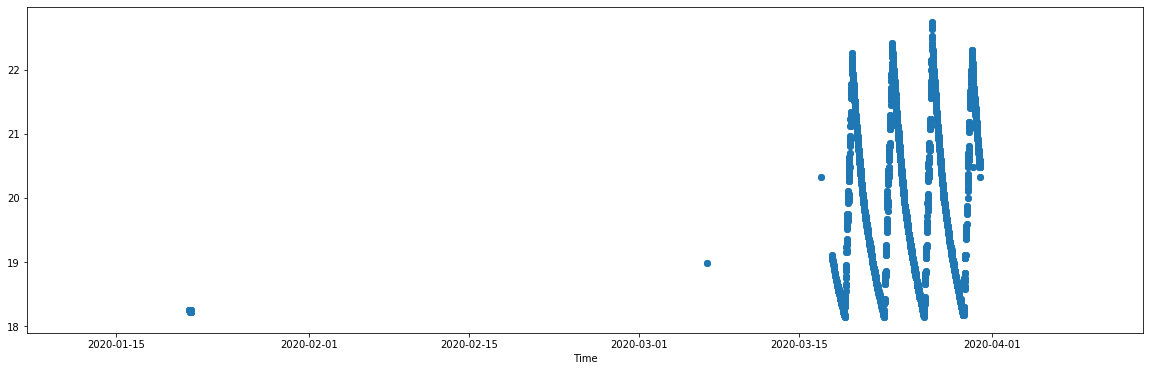

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,6))
plt.scatter(data['UTC'],data['eng_value'])
plt.xlabel('Time')

In [17]:
print(data['UTC'][0].month)
print(type(data['UTC'][0].second))

1
<class 'int'>


In [18]:
from datetime import  timedelta

data = data.append({'index':345,
             'name':'TH',
             'eng_value':0.0,
             'generation_time': 89878,
             'UTC':data['UTC'][len(data)-1] + timedelta(hours=1)},ignore_index=True)

# data = data.append({'index':345,
#              'name':'TH',
#              'eng_value':0.0,
#              'generation_time': 89878,
#              'UTC':data['UTC'][len(data)-1] + timedelta(hours=1)})

# data['UTC'][len(data)+2] = data['UTC'][len(data)-1] + timedelta(hours=1)
data

,index,name,eng_value,generation_time,UTC
0,2268,TTH15A,18.259109,1579579416652812500,2020-01-21 11:03:36.652812
1,3406,TTH15A,18.259109,1579579416652812500,2020-01-21 11:03:36.652812
2,3408,TTH15A,18.259109,1579579544652812500,2020-01-21 11:05:44.652812
3,3471,TTH15A,18.259109,1579579544652812500,2020-01-21 11:05:44.652812
4,2837,TTH15A,18.259109,1579581464648906250,2020-01-21 11:37:44.648906
...,...,...,...,...,...
3595,4102,TTH15A,20.483871,1585578456656718750,2020-03-30 21:27:36.656719
3596,4191,TTH15A,20.483871,1585578456656718750,2020-03-30 21:27:36.656719
3597,4192,TTH15A,20.322581,1585584304656718750,2020-03-30 23:05:04.656719
3598,4193,TTH15A,20.322581,1585584304656718750,2020-03-30 23:05:04.656719


In [19]:
# fine start & end date
# from datetime import  timedelta
start_date = data['UTC'][0]
# sp =split(start_)
end_date = data['UTC'][len(data)-1]
# +1 เพราะต้องการสร้าง ชม เกินมา 1 ชม เพื่อใช้วน loop หาค่า avg ช่วงสุดท้าย

In [20]:
end_date

Timestamp('2020-03-31 00:05:04.656719')

In [21]:
end_date

Timestamp('2020-03-31 00:05:04.656719')

In [22]:
type(start_date.year)

int

In [23]:
dt = datetime.datetime(start_date.year, start_date.month, start_date.day, start_date.hour, start_date.minute, start_date.second )

In [24]:
dt

datetime.datetime(2020, 1, 21, 11, 3, 36)

In [25]:
import datetime

# start_date = data['UTC'][0]
# end_date = data['UTC'][-1]
# dt = datetime.datetime(start_date.year, start_date.month, start_date.day, start_date.hour, start_date.minute, start_date.second )

dt = datetime.datetime(start_date.year, start_date.month, start_date.day, start_date.hour)
end = datetime.datetime(end_date.year, end_date.month, end_date.day, end_date.hour , end_date.minute, end_date.second) 
# dt = datetime.datetime(2010, 12, 1, 3, 9, 9)
# end = datetime.datetime(2010, 12, 30, 23, 59, 59)
# end = datetime.datetime(2020, 3, 20, 17)
step = datetime.timedelta(minutes=60)

result = []
# print(dt)
while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

In [26]:
result

['2020-01-21 11:00:00',
 '2020-01-21 12:00:00',
 '2020-01-21 13:00:00',
 '2020-01-21 14:00:00',
 '2020-01-21 15:00:00',
 '2020-01-21 16:00:00',
 '2020-01-21 17:00:00',
 '2020-01-21 18:00:00',
 '2020-01-21 19:00:00',
 '2020-01-21 20:00:00',
 '2020-01-21 21:00:00',
 '2020-01-21 22:00:00',
 '2020-01-21 23:00:00',
 '2020-01-22 00:00:00',
 '2020-01-22 01:00:00',
 '2020-01-22 02:00:00',
 '2020-01-22 03:00:00',
 '2020-01-22 04:00:00',
 '2020-01-22 05:00:00',
 '2020-01-22 06:00:00',
 '2020-01-22 07:00:00',
 '2020-01-22 08:00:00',
 '2020-01-22 09:00:00',
 '2020-01-22 10:00:00',
 '2020-01-22 11:00:00',
 '2020-01-22 12:00:00',
 '2020-01-22 13:00:00',
 '2020-01-22 14:00:00',
 '2020-01-22 15:00:00',
 '2020-01-22 16:00:00',
 '2020-01-22 17:00:00',
 '2020-01-22 18:00:00',
 '2020-01-22 19:00:00',
 '2020-01-22 20:00:00',
 '2020-01-22 21:00:00',
 '2020-01-22 22:00:00',
 '2020-01-22 23:00:00',
 '2020-01-23 00:00:00',
 '2020-01-23 01:00:00',
 '2020-01-23 02:00:00',
 '2020-01-23 03:00:00',
 '2020-01-23 04:

In [27]:
print(len(result))
# print(result[0])
# print(result[-1])
# print(type(result[-1]))

1670


In [28]:
# import datetime

# date_time_str = '2018-06-29 08:15:27.243860'
# date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')


# date_time_str = '2018-06-29 08:15:27'
# date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
# print(type(date_time_obj))
# print(date_time_obj.year)
# print('Date:', date_time_obj.date())
# print('Time:', date_time_obj.time())
# print('Date-time:', date_time_obj)

In [29]:
df = pd.DataFrame(result, columns=['date'])
df

,date
0,2020-01-21 11:00:00
1,2020-01-21 12:00:00
2,2020-01-21 13:00:00
3,2020-01-21 14:00:00
4,2020-01-21 15:00:00
...,...
1665,2020-03-30 20:00:00
1666,2020-03-30 21:00:00
1667,2020-03-30 22:00:00
1668,2020-03-30 23:00:00


In [30]:
data_fit = {'date': [], 'avg': [], 'max':[], 'min':[]}
data_fit = pd.DataFrame(data=data_fit)
data_fit

,date,avg,max,min


In [31]:
       
n = 0
for i in range(len(result)):
    date_new = result[i]
    print('-----------------------------------------------------------------------------------------------------------------')
    date_new = datetime.datetime.strptime(date_new, '%Y-%m-%d %H:%M:%S')
    print(date_new)
#     data_fit = data_fit.append({'date':date_new},ignore_index=True) # ใช้แจ้ง anomaly ได้
    engvalue_tot = []  # engvalue_tot ใช้เก็บข้อมูลที่มี ชม เดียวกัน
    for j in range(n, len(data)):
        date_data = data['UTC'][j]
        if date_data.year == date_new.year  and date_data.month == date_new.month and date_data.day == date_new.day and date_data.hour == date_new.hour:
            print('n = ',n)
            print(date_data)
            engvalue_tot.append(data['eng_value'][j])
#             print(engvalue)
            n = n+1
        else:
            
            if engvalue_tot != []:
                print(date_new)
                print('TOT = ',engvalue_tot )
                average = sum(engvalue_tot) / len(engvalue_tot)
                print('avg = ',average)
                print('MAX = ', max(engvalue_tot))
                print('MIN = ', min(engvalue_tot))
                
                data_fit = data_fit.append({'date':date_new,'avg':average, 
                                    'max':max(engvalue_tot),
                                    'min':min(engvalue_tot)},ignore_index=True)
#                                 data_fit = data_fit.append({'date':date_new,
#                                     'avg':average, 
#                                     'max':max(engvalue_tot),
#                                     'min':min(engvalue_tot)},ignore_index=True)
            else:
                engvalue_tot=0
                print('TOT = ',engvalue_tot )
                data_fit = data_fit.append({'date':date_new,'avg':0, 
                                    'max':0,
                                    'min':0},ignore_index=True)
            break
#         else:
#             average = sum(engvalue) / len(engvalue)
#             print(average)
        
        

-----------------------------------------------------------------------------------------------------------------
2020-01-21 11:00:00
n =  0
2020-01-21 11:03:36.652812
n =  1
2020-01-21 11:03:36.652812
n =  2
2020-01-21 11:05:44.652812
n =  3
2020-01-21 11:05:44.652812
n =  4
2020-01-21 11:37:44.648906
n =  5
2020-01-21 11:37:44.648906
n =  6
2020-01-21 11:48:24.652812
n =  7
2020-01-21 11:48:24.652812
2020-01-21 11:00:00
TOT =  [18.259109, 18.25910931174089, 18.25910931174089, 18.259109, 18.259109, 18.25910931174089, 18.259109, 18.25910931174089]
avg =  18.259109155870444
MAX =  18.25910931174089
MIN =  18.259109
-----------------------------------------------------------------------------------------------------------------
2020-01-21 12:00:00
n =  8
2020-01-21 12:43:52.652812
n =  9
2020-01-21 12:43:52.652812
n =  10
2020-01-21 12:50:16.652812
n =  11
2020-01-21 12:50:16.652812
2020-01-21 12:00:00
TOT =  [18.218623, 18.21862348178138, 18.21862348178138, 18.218623]
avg =  18.21862324

-----------------------------------------------------------------------------------------------------------------
2020-01-24 02:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-24 03:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-24 04:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-24 05:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-24 06:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-24 07:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-24 08:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-01-26 20:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-26 21:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-26 22:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-26 23:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-27 00:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-27 01:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-27 02:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-01-29 20:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-29 21:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-29 22:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-29 23:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-30 00:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-30 01:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-01-30 02:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-01 11:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-01 12:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-01 13:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-01 14:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-01 15:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-01 16:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-01 17:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-04 05:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-04 06:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-04 07:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-04 08:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-04 09:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-04 10:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-04 11:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-06 15:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-06 16:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-06 17:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-06 18:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-06 19:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-06 20:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-06 21:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-09 13:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-09 14:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-09 15:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-09 16:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-09 17:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-09 18:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-09 19:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-12 01:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-12 02:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-12 03:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-12 04:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-12 05:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-12 06:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-12 07:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-14 18:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-14 19:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-14 20:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-14 21:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-14 22:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-14 23:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-15 00:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-17 19:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-17 20:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-17 21:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-17 22:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-17 23:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-18 00:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-18 01:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-20 11:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-20 12:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-20 13:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-20 14:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-20 15:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-20 16:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-20 17:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-23 02:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-23 03:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-23 04:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-23 05:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-23 06:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-23 07:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-23 08:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-26 17:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-26 18:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-26 19:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-26 20:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-26 21:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-26 22:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-26 23:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-02-29 05:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-29 06:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-29 07:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-29 08:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-29 09:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-29 10:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-02-29 11:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-03-03 00:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-03 01:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-03 02:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-03 03:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-03 04:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-03 05:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-03 06:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-03-05 13:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-05 14:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-05 15:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-05 16:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-05 17:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-05 18:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-05 19:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-03-08 06:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-08 07:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-08 08:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-08 09:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-08 10:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-08 11:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-08 12:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-03-10 21:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-10 22:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-10 23:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-11 00:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-11 01:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-11 02:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-11 03:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-03-13 12:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-13 13:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-13 14:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-13 15:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-13 16:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-13 17:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-13 18:00:00
TOT =  0

-----------------------------------------------------------------------------------------------------------------
2020-03-16 01:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-16 02:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-16 03:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-16 04:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-16 05:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-16 06:00:00
TOT =  0
-----------------------------------------------------------------------------------------------------------------
2020-03-16 07:00:00
TOT =  0

MIN =  18.744939000000002
-----------------------------------------------------------------------------------------------------------------
2020-03-18 06:00:00
n =  59
2020-03-18 06:47:36.656719
n =  60
2020-03-18 06:58:16.652812
2020-03-18 06:00:00
TOT =  [18.704453, 18.744939000000002]
avg =  18.724696
MAX =  18.744939000000002
MIN =  18.704453
-----------------------------------------------------------------------------------------------------------------
2020-03-18 07:00:00
n =  61
2020-03-18 07:04:40.652812
n =  62
2020-03-18 07:51:36.656719
2020-03-18 07:00:00
TOT =  [18.704453, 18.663968]
avg =  18.6842105
MAX =  18.704453
MIN =  18.663968
-----------------------------------------------------------------------------------------------------------------
2020-03-18 08:00:00
n =  63
2020-03-18 08:12:56.656719
n =  64
2020-03-18 08:19:20.648906
2020-03-18 08:00:00
TOT =  [18.704453, 18.663968]
avg =  18.6842105
MAX =  18.704453
MIN =  18.663968
---------------------------------------

-----------------------------------------------------------------------------------------------------------------
2020-03-19 01:00:00
n =  197
2020-03-19 01:08:24.656719
n =  198
2020-03-19 01:08:24.656719
n =  199
2020-03-19 01:10:32.656719
n =  200
2020-03-19 01:10:32.656719
n =  201
2020-03-19 01:34:00.656719
n =  202
2020-03-19 01:34:00.656719
n =  203
2020-03-19 01:36:08.656719
n =  204
2020-03-19 01:36:08.656719
n =  205
2020-03-19 01:38:16.660625
n =  206
2020-03-19 01:38:16.660625
n =  207
2020-03-19 01:48:56.656719
n =  208
2020-03-19 01:48:56.656719
2020-03-19 01:00:00
TOT =  [18.299595141700404, 18.299595, 18.340080971659923, 18.340081, 18.380566801619434, 18.380567000000003, 18.46153846153846, 18.461538, 18.421053, 18.42105263157895, 18.46153846153846, 18.461538]
avg =  18.3940620391363
MAX =  18.46153846153846
MIN =  18.299595
-----------------------------------------------------------------------------------------------------------------
2020-03-19 02:00:00
n =  209
2020-

n =  354
2020-03-19 10:38:00.656719
n =  355
2020-03-19 10:46:32.656719
n =  356
2020-03-19 10:46:32.656719
2020-03-19 10:00:00
TOT =  [20.43010752688172, 20.430107999999997, 20.483870967741932, 20.483871, 20.43010752688172, 20.430107999999997, 20.645160999999998, 20.645161290322577, 20.591398, 20.591397849462368, 20.591398, 20.591397849462368, 20.537634408602152, 20.537634, 20.483870967741932, 20.483871, 20.483871, 20.483870967741932, 20.43010752688172, 20.430107999999997, 20.483871, 20.483870967741932, 20.43010752688172, 20.430107999999997, 20.43010752688172, 20.430107999999997, 20.483870967741932, 20.483871, 20.43010752688172, 20.430107999999997, 20.483870967741932, 20.483871, 20.483870967741932, 20.483871, 20.537634408602152, 20.537634, 20.483871, 20.483870967741932, 20.537634, 20.537634408602152, 20.483871, 20.483870967741932, 20.483871, 20.483870967741932, 20.430107999999997, 20.43010752688172]
avg =  20.49088364305751
MAX =  20.645161290322577
MIN =  20.43010752688172
----------

MIN =  21.666666666666664
-----------------------------------------------------------------------------------------------------------------
2020-03-19 20:00:00
n =  479
2020-03-19 20:01:12.656719
n =  480
2020-03-19 20:01:12.656719
n =  481
2020-03-19 20:09:44.656719
n =  482
2020-03-19 20:09:44.656719
n =  483
2020-03-19 20:14:00.660625
n =  484
2020-03-19 20:14:00.660625
n =  485
2020-03-19 20:18:16.656719
n =  486
2020-03-19 20:18:16.656719
n =  487
2020-03-19 20:33:12.656719
n =  488
2020-03-19 20:33:12.656719
n =  489
2020-03-19 20:58:48.656719
n =  490
2020-03-19 20:58:48.656719
2020-03-19 20:00:00
TOT =  [21.612903225806452, 21.612903, 21.72043, 21.72043010752688, 21.666667, 21.666666666666664, 21.612903, 21.612903225806452, 21.55914, 21.559139784946236, 21.612903, 21.612903225806452]
avg =  21.63082435304659
MAX =  21.72043010752688
MIN =  21.559139784946236
-----------------------------------------------------------------------------------------------------------------
2020-03

MIN =  20.21505376344086
-----------------------------------------------------------------------------------------------------------------
2020-03-20 12:00:00
n =  717
2020-03-20 12:16:08.660625
n =  718
2020-03-20 12:16:08.660625
n =  719
2020-03-20 12:18:16.656719
n =  720
2020-03-20 12:18:16.656719
n =  721
2020-03-20 12:20:24.656719
n =  722
2020-03-20 12:20:24.656719
n =  723
2020-03-20 12:37:28.656719
n =  724
2020-03-20 12:37:28.656719
n =  725
2020-03-20 12:43:52.656719
n =  726
2020-03-20 12:43:52.656719
2020-03-20 12:00:00
TOT =  [20.161290322580644, 20.16129, 20.215054000000002, 20.21505376344086, 20.16129, 20.161290322580644, 20.215054000000002, 20.21505376344086, 20.16129, 20.161290322580644]
avg =  20.182795649462367
MAX =  20.215054000000002
MIN =  20.16129
-----------------------------------------------------------------------------------------------------------------
2020-03-20 13:00:00
n =  727
2020-03-20 13:05:12.656719
n =  728
2020-03-20 13:05:12.656719
n =  729
20

n =  901
2020-03-21 02:20:56.656719
n =  902
2020-03-21 02:20:56.656719
n =  903
2020-03-21 02:35:52.660625
n =  904
2020-03-21 02:35:52.660625
n =  905
2020-03-21 02:42:16.656719
n =  906
2020-03-21 02:42:16.656719
2020-03-21 02:00:00
TOT =  [19.392713, 19.39271255060729, 19.433198, 19.4331983805668, 19.473684210526315, 19.473684, 19.433198, 19.4331983805668, 19.4331983805668, 19.433198, 19.392713, 19.39271255060729, 19.433198, 19.4331983805668, 19.392713, 19.39271255060729]
avg =  19.423076899038463
MAX =  19.473684210526315
MIN =  19.39271255060729
-----------------------------------------------------------------------------------------------------------------
2020-03-21 03:00:00
n =  907
2020-03-21 03:10:00.660625
n =  908
2020-03-21 03:10:00.660625
2020-03-21 03:00:00
TOT =  [19.352227, 19.352226720647774]
avg =  19.35222686032389
MAX =  19.352227
MIN =  19.352226720647774
-------------------------------------------------------------------------------------------------------------

TOT =  [18.82591093117409, 18.825910999999998, 18.866396761133608, 18.866397, 18.825910999999998, 18.82591093117409]
avg =  18.839406270580298
MAX =  18.866397
MIN =  18.82591093117409
-----------------------------------------------------------------------------------------------------------------
2020-03-21 16:00:00
n =  1007
2020-03-21 16:25:44.656719
n =  1008
2020-03-21 16:25:44.656719
n =  1009
2020-03-21 16:38:32.656719
n =  1010
2020-03-21 16:38:32.656719
n =  1011
2020-03-21 16:40:40.660625
n =  1012
2020-03-21 16:40:40.660625
2020-03-21 16:00:00
TOT =  [18.785425101214575, 18.785425, 18.825910999999998, 18.82591093117409, 18.785425, 18.785425101214575]
avg =  18.79892035560054
MAX =  18.825910999999998
MIN =  18.785425
-----------------------------------------------------------------------------------------------------------------
2020-03-21 17:00:00
n =  1013
2020-03-21 17:08:24.660625
n =  1014
2020-03-21 17:08:24.660625
n =  1015
2020-03-21 17:10:32.660625
n =  1016
2020-03

-----------------------------------------------------------------------------------------------------------------
2020-03-22 12:00:00
n =  1125
2020-03-22 12:01:12.656719
n =  1126
2020-03-22 12:01:12.656719
n =  1127
2020-03-22 12:26:48.656719
n =  1128
2020-03-22 12:26:48.656719
2020-03-22 12:00:00
TOT =  [18.259109, 18.25910931174089, 18.340081, 18.340080971659923]
avg =  18.299595070850202
MAX =  18.340081
MIN =  18.259109
-----------------------------------------------------------------------------------------------------------------
2020-03-22 13:00:00
n =  1129
2020-03-22 13:09:28.656719
n =  1130
2020-03-22 13:09:28.656719
n =  1131
2020-03-22 13:26:32.660625
n =  1132
2020-03-22 13:26:32.660625
n =  1133
2020-03-22 13:39:20.656719
n =  1134
2020-03-22 13:39:20.656719
n =  1135
2020-03-22 13:41:28.656719
n =  1136
2020-03-22 13:41:28.656719
n =  1137
2020-03-22 13:43:36.656719
n =  1138
2020-03-22 13:43:36.656719
n =  1139
2020-03-22 13:50:00.656719
n =  1140
2020-03-22 13:50:0

-----------------------------------------------------------------------------------------------------------------
2020-03-22 23:00:00
n =  1297
2020-03-22 23:28:08.656719
n =  1298
2020-03-22 23:28:08.656719
n =  1299
2020-03-22 23:34:32.656719
n =  1300
2020-03-22 23:34:32.656719
n =  1301
2020-03-22 23:47:20.656719
n =  1302
2020-03-22 23:47:20.656719
n =  1303
2020-03-22 23:49:28.656719
n =  1304
2020-03-22 23:49:28.656719
n =  1305
2020-03-22 23:51:36.656719
n =  1306
2020-03-22 23:51:36.656719
n =  1307
2020-03-22 23:58:00.656719
n =  1308
2020-03-22 23:58:00.656719
2020-03-22 23:00:00
TOT =  [20.806451612903224, 20.806452, 20.806451612903224, 20.806452, 20.860215053763444, 20.860215, 21.0752688172043, 21.075269, 21.182796, 21.18279569892473, 21.129032000000002, 21.12903225806452]
avg =  20.976702587813616
MAX =  21.182796
MIN =  20.806451612903224
-----------------------------------------------------------------------------------------------------------------
2020-03-23 00:00:00


-----------------------------------------------------------------------------------------------------------------
2020-03-23 11:00:00
n =  1469
2020-03-23 11:05:44.656719
n =  1470
2020-03-23 11:05:44.656719
n =  1471
2020-03-23 11:29:12.656719
n =  1472
2020-03-23 11:29:12.656719
n =  1473
2020-03-23 11:37:44.656719
n =  1474
2020-03-23 11:37:44.656719
n =  1475
2020-03-23 11:39:52.656719
n =  1476
2020-03-23 11:39:52.656719
n =  1477
2020-03-23 11:42:00.652812
n =  1478
2020-03-23 11:42:00.652812
n =  1479
2020-03-23 11:48:24.652812
n =  1480
2020-03-23 11:48:24.652812
2020-03-23 11:00:00
TOT =  [21.612903, 21.612903225806452, 21.559139784946236, 21.55914, 21.612903225806452, 21.612903, 21.666666666666664, 21.666667, 21.612903225806452, 21.612903, 21.559139784946236, 21.55914]
avg =  21.603942659498205
MAX =  21.666667
MIN =  21.559139784946236
-----------------------------------------------------------------------------------------------------------------
2020-03-23 12:00:00
n =  14

n =  1617
2020-03-23 22:19:52.660625
n =  1618
2020-03-23 22:19:52.660625
n =  1619
2020-03-23 22:36:56.656719
n =  1620
2020-03-23 22:36:56.656719
n =  1621
2020-03-23 22:45:28.656719
n =  1622
2020-03-23 22:45:28.656719
n =  1623
2020-03-23 22:47:36.656719
n =  1624
2020-03-23 22:47:36.656719
2020-03-23 22:00:00
TOT =  [20.591398, 20.591397849462368, 20.645161290322577, 20.645160999999998, 20.591397849462368, 20.591398, 20.645161290322577, 20.645160999999998, 20.645161290322577, 20.645160999999998, 20.591398, 20.591397849462368, 20.645161290322577, 20.645160999999998, 20.591398, 20.645160999999998, 20.591398, 20.591397849462368, 20.645161290322577, 20.645160999999998, 20.591398, 20.591397849462368, 20.537634408602152, 20.537634, 20.591398, 20.591397849462368, 20.537634408602152, 20.537634]
avg =  20.604838655913976
MAX =  20.645161290322577
MIN =  20.537634
-----------------------------------------------------------------------------------------------------------------
2020-03-23 23:

n =  1746
2020-03-24 11:39:52.656719
n =  1747
2020-03-24 11:46:16.656719
n =  1748
2020-03-24 11:46:16.656719
n =  1749
2020-03-24 11:54:48.660625
n =  1750
2020-03-24 11:54:48.660625
2020-03-24 11:00:00
TOT =  [19.7165991902834, 19.716599, 19.676113, 19.676113360323885, 19.63562753036437, 19.635628, 19.676113360323885, 19.676113, 19.63562753036437, 19.635628]
avg =  19.66801619716599
MAX =  19.7165991902834
MIN =  19.63562753036437
-----------------------------------------------------------------------------------------------------------------
2020-03-24 12:00:00
n =  1751
2020-03-24 12:16:08.656719
n =  1752
2020-03-24 12:16:08.656719
n =  1753
2020-03-24 12:18:16.660625
n =  1754
2020-03-24 12:18:16.660625
n =  1755
2020-03-24 12:20:24.656719
n =  1756
2020-03-24 12:20:24.656719
n =  1757
2020-03-24 12:56:40.641094
n =  1758
2020-03-24 12:56:40.641094
2020-03-24 12:00:00
TOT =  [19.595142000000003, 19.59514170040486, 19.635628, 19.63562753036437, 19.595142000000003, 19.595141700404

-----------------------------------------------------------------------------------------------------------------
2020-03-25 04:00:00
n =  1891
2020-03-25 04:14:00.656719
n =  1892
2020-03-25 04:14:00.656719
n =  1893
2020-03-25 04:20:24.656719
n =  1894
2020-03-25 04:20:24.656719
n =  1895
2020-03-25 04:41:44.656719
n =  1896
2020-03-25 04:41:44.656719
n =  1897
2020-03-25 04:43:52.660625
n =  1898
2020-03-25 04:43:52.660625
2020-03-25 04:00:00
TOT =  [18.906882999999997, 18.90688259109312, 18.866397, 18.866396761133608, 18.906882999999997, 18.90688259109312, 18.866396761133608, 18.866397]
avg =  18.88663983805668
MAX =  18.906882999999997
MIN =  18.866396761133608
-----------------------------------------------------------------------------------------------------------------
2020-03-25 05:00:00
n =  1899
2020-03-25 05:09:28.656719
n =  1900
2020-03-25 05:09:28.656719
n =  1901
2020-03-25 05:50:00.656719
n =  1902
2020-03-25 05:50:00.656719
n =  1903
2020-03-25 05:54:16.656719
n =  1

-----------------------------------------------------------------------------------------------------------------
2020-03-25 19:00:00
n =  2033
2020-03-25 19:27:04.656719
n =  2034
2020-03-25 19:27:04.656719
n =  2035
2020-03-25 19:31:20.656719
n =  2036
2020-03-25 19:31:20.656719
n =  2037
2020-03-25 19:48:24.656719
n =  2038
2020-03-25 19:48:24.656719
2020-03-25 19:00:00
TOT =  [18.340081, 18.340080971659923, 18.299595, 18.299595141700404, 18.299595141700404, 18.299595]
avg =  18.313090375843455
MAX =  18.340081
MIN =  18.299595
-----------------------------------------------------------------------------------------------------------------
2020-03-25 20:00:00
n =  2039
2020-03-25 20:22:32.656719
n =  2040
2020-03-25 20:22:32.656719
2020-03-25 20:00:00
TOT =  [18.25910931174089, 18.259109]
avg =  18.259109155870444
MAX =  18.25910931174089
MIN =  18.259109
-----------------------------------------------------------------------------------------------------------------
2020-03-25 21:0

-----------------------------------------------------------------------------------------------------------------
2020-03-26 08:00:00
n =  2172
2020-03-26 08:08:40.656719
n =  2173
2020-03-26 08:08:40.656719
n =  2174
2020-03-26 08:10:48.656719
n =  2175
2020-03-26 08:10:48.656719
n =  2176
2020-03-26 08:12:56.656719
n =  2177
2020-03-26 08:12:56.656719
n =  2178
2020-03-26 08:30:00.660625
n =  2179
2020-03-26 08:30:00.660625
n =  2180
2020-03-26 08:32:08.660625
n =  2181
2020-03-26 08:32:08.660625
n =  2182
2020-03-26 08:34:16.656719
n =  2183
2020-03-26 08:34:16.656719
n =  2184
2020-03-26 08:38:32.660625
n =  2185
2020-03-26 08:38:32.660625
n =  2186
2020-03-26 08:57:44.652812
n =  2187
2020-03-26 08:57:44.652812
n =  2188
2020-03-26 08:59:52.656719
n =  2189
2020-03-26 08:59:52.656719
2020-03-26 08:00:00
TOT =  [19.87854251012146, 19.878543, 20.0, 20.0, 19.91902834008097, 19.919028, 20.053763440860216, 20.053763, 20.0, 20.0, 19.959514000000002, 19.959514170040485, 19.91902834008097

n =  2378
2020-03-26 19:33:28.652812
n =  2379
2020-03-26 19:33:28.652812
n =  2380
2020-03-26 19:35:36.656719
n =  2381
2020-03-26 19:35:36.656719
n =  2382
2020-03-26 19:37:44.660625
n =  2383
2020-03-26 19:37:44.660625
n =  2384
2020-03-26 19:42:00.656719
n =  2385
2020-03-26 19:42:00.656719
n =  2386
2020-03-26 19:56:56.660625
n =  2387
2020-03-26 19:56:56.660625
2020-03-26 19:00:00
TOT =  [22.204301, 22.204301075268816, 22.150537634408604, 22.150538, 22.096774193548388, 22.096774, 22.043011, 22.04301075268817, 22.096774193548388, 22.096774, 22.150537634408604, 22.150538, 22.096774, 22.096774193548388, 22.04301075268817, 22.043011, 21.98924731182796, 21.989247]
avg =  22.096774207885304
MAX =  22.204301075268816
MIN =  21.989247
-----------------------------------------------------------------------------------------------------------------
2020-03-26 20:00:00
n =  2388
2020-03-26 20:18:16.656719
n =  2389
2020-03-26 20:18:16.656719
n =  2390
2020-03-26 20:43:52.648906
n =  2391
20

-----------------------------------------------------------------------------------------------------------------
2020-03-27 09:00:00
n =  2538
2020-03-27 09:04:08.656719
n =  2539
2020-03-27 09:04:08.656719
n =  2540
2020-03-27 09:12:40.656719
n =  2541
2020-03-27 09:12:40.656719
n =  2542
2020-03-27 09:34:08.656719
n =  2543
2020-03-27 09:34:08.656719
n =  2544
2020-03-27 09:37:04.660625
n =  2545
2020-03-27 09:37:04.660625
n =  2546
2020-03-27 09:37:12.656719
n =  2547
2020-03-27 09:37:12.656719
n =  2548
2020-03-27 09:37:20.656719
n =  2549
2020-03-27 09:37:20.656719
n =  2550
2020-03-27 09:37:28.656719
n =  2551
2020-03-27 09:37:28.656719
n =  2552
2020-03-27 09:37:36.656719
n =  2553
2020-03-27 09:37:36.656719
n =  2554
2020-03-27 09:37:44.656719
n =  2555
2020-03-27 09:37:44.656719
n =  2556
2020-03-27 09:38:00.656719
n =  2557
2020-03-27 09:38:00.656719
n =  2558
2020-03-27 09:38:16.656719
n =  2559
2020-03-27 09:38:16.656719
n =  2560
2020-03-27 09:38:32.660625
n =  2561
2020-

-----------------------------------------------------------------------------------------------------------------
2020-03-28 00:00:00
n =  2738
2020-03-28 00:00:08.656719
n =  2739
2020-03-28 00:00:08.656719
n =  2740
2020-03-28 00:19:20.652812
n =  2741
2020-03-28 00:19:20.652812
n =  2742
2020-03-28 00:21:28.656719
n =  2743
2020-03-28 00:21:28.656719
n =  2744
2020-03-28 00:32:08.656719
n =  2745
2020-03-28 00:32:08.656719
n =  2746
2020-03-28 00:59:52.656719
n =  2747
2020-03-28 00:59:52.656719
2020-03-28 00:00:00
TOT =  [19.63562753036437, 19.635628, 19.676113360323885, 19.676113, 19.63562753036437, 19.635628, 19.59514170040486, 19.595142000000003, 19.554655870445345, 19.554656]
avg =  19.619433299190284
MAX =  19.676113360323885
MIN =  19.554655870445345
-----------------------------------------------------------------------------------------------------------------
2020-03-28 01:00:00
n =  2748
2020-03-28 01:34:00.656719
n =  2749
2020-03-28 01:34:00.656719
n =  2750
2020-03-28 

-----------------------------------------------------------------------------------------------------------------
2020-03-28 13:00:00
n =  2885
2020-03-28 13:24:24.656719
n =  2886
2020-03-28 13:24:24.656719
n =  2887
2020-03-28 13:26:32.656719
n =  2888
2020-03-28 13:26:32.656719
n =  2889
2020-03-28 13:47:52.652812
n =  2890
2020-03-28 13:47:52.652812
n =  2891
2020-03-28 13:50:00.645000
n =  2892
2020-03-28 13:50:00.645000
2020-03-28 13:00:00
TOT =  [19.02834008097166, 19.02834, 18.987854251012145, 18.987854000000002, 18.94736842105263, 18.947368, 18.987854000000002, 18.987854251012145]
avg =  18.987854125506075
MAX =  19.02834008097166
MIN =  18.947368
-----------------------------------------------------------------------------------------------------------------
2020-03-28 14:00:00
n =  2893
2020-03-28 14:00:40.656719
n =  2894
2020-03-28 14:00:40.656719
n =  2895
2020-03-28 14:17:44.652812
n =  2896
2020-03-28 14:17:44.652812
n =  2897
2020-03-28 14:22:00.656719
n =  2898
2020-0

-----------------------------------------------------------------------------------------------------------------
2020-03-29 05:00:00
n =  3005
2020-03-29 05:05:12.609844
n =  3006
2020-03-29 05:05:12.609844
n =  3007
2020-03-29 05:07:20.656719
n =  3008
2020-03-29 05:07:20.656719
n =  3009
2020-03-29 05:39:20.656719
n =  3010
2020-03-29 05:39:20.656719
2020-03-29 05:00:00
TOT =  [18.42105263157895, 18.421053, 18.380566801619434, 18.380567000000003, 18.340081, 18.340080971659923]
avg =  18.380566900809715
MAX =  18.421053
MIN =  18.340080971659923
-----------------------------------------------------------------------------------------------------------------
2020-03-29 06:00:00
n =  3011
2020-03-29 06:41:12.656719
n =  3012
2020-03-29 06:41:12.656719
n =  3013
2020-03-29 06:43:20.648906
n =  3014
2020-03-29 06:43:20.648906
n =  3015
2020-03-29 06:58:16.656719
n =  3016
2020-03-29 06:58:16.656719
2020-03-29 06:00:00
TOT =  [18.299595, 18.299595141700404, 18.340081, 18.340080971659923, 

-----------------------------------------------------------------------------------------------------------------
2020-03-29 19:00:00
n =  3169
2020-03-29 19:27:04.660625
n =  3170
2020-03-29 19:27:04.660625
n =  3171
2020-03-29 19:44:08.656719
n =  3172
2020-03-29 19:44:08.656719
n =  3173
2020-03-29 19:50:32.656719
n =  3174
2020-03-29 19:50:32.656719
n =  3175
2020-03-29 19:52:40.656719
n =  3176
2020-03-29 19:52:40.656719
2020-03-29 19:00:00
TOT =  [19.838057, 19.838056680161944, 19.878543, 19.87854251012146, 20.0, 20.0, 20.161290322580644, 20.16129]
avg =  19.969472439108007
MAX =  20.161290322580644
MIN =  19.838056680161944
-----------------------------------------------------------------------------------------------------------------
2020-03-29 20:00:00
n =  3177
2020-03-29 20:14:00.656719
n =  3178
2020-03-29 20:14:00.656719
n =  3179
2020-03-29 20:18:16.648906
n =  3180
2020-03-29 20:18:16.648906
n =  3181
2020-03-29 20:26:48.660625
n =  3182
2020-03-29 20:26:48.660625
2020-

-----------------------------------------------------------------------------------------------------------------
2020-03-30 00:00:00
n =  3301
2020-03-30 00:19:20.660625
n =  3302
2020-03-30 00:19:20.660625
n =  3303
2020-03-30 00:42:48.656719
n =  3304
2020-03-30 00:42:48.656719
n =  3305
2020-03-30 00:55:36.656719
n =  3306
2020-03-30 00:55:36.656719
n =  3307
2020-03-30 00:57:44.656719
n =  3308
2020-03-30 00:57:44.656719
2020-03-30 00:00:00
TOT =  [21.0752688172043, 21.075269, 21.129032000000002, 21.12903225806452, 21.451613000000002, 21.451612903225808, 21.666667, 21.666666666666664]
avg =  21.330645205645162
MAX =  21.666667
MIN =  21.0752688172043
-----------------------------------------------------------------------------------------------------------------
2020-03-30 01:00:00
n =  3309
2020-03-30 01:02:00.656719
n =  3310
2020-03-30 01:02:00.656719
n =  3311
2020-03-30 01:04:08.656719
n =  3312
2020-03-30 01:04:08.656719
n =  3313
2020-03-30 01:06:16.656719
n =  3314
2020-03

n =  3574
2020-03-30 19:56:56.609844
n =  3575
2020-03-30 19:59:04.652812
n =  3576
2020-03-30 19:59:04.652812
2020-03-30 19:00:00
TOT =  [20.645161290322577, 20.645160999999998, 20.698924731182803, 20.698925, 20.752688172043012, 20.752688, 20.698925, 20.698924731182803, 20.645160999999998, 20.645161290322577, 20.591397849462368, 20.591398, 20.698924731182803, 20.698925, 20.645161290322577, 20.645160999999998]
avg =  20.67204300537634
MAX =  20.752688172043012
MIN =  20.591397849462368
-----------------------------------------------------------------------------------------------------------------
2020-03-30 20:00:00
n =  3577
2020-03-30 20:07:36.656719
n =  3578
2020-03-30 20:07:36.656719
n =  3579
2020-03-30 20:33:12.656719
n =  3580
2020-03-30 20:33:12.656719
2020-03-30 20:00:00
TOT =  [20.591398, 20.591397849462368, 20.537634, 20.537634408602152]
avg =  20.564516064516127
MAX =  20.591398
MIN =  20.537634
-----------------------------------------------------------------------------

In [32]:
data_fit.head(40)

,date,avg,max,min
0,2020-01-21 11:00:00,18.259109,18.259109,18.259109
1,2020-01-21 12:00:00,18.218623,18.218623,18.218623
2,2020-01-21 13:00:00,18.238866,18.259109,18.218623
3,2020-01-21 14:00:00,18.218623,18.218623,18.218623
4,2020-01-21 15:00:00,0.000000,0.000000,0.000000
5,2020-01-21 16:00:00,0.000000,0.000000,0.000000
6,2020-01-21 17:00:00,0.000000,0.000000,0.000000
7,2020-01-21 18:00:00,0.000000,0.000000,0.000000
8,2020-01-21 19:00:00,0.000000,0.000000,0.000000
9,2020-01-21 20:00:00,0.000000,0.000000,0.000000


In [33]:
data_fit['avg']

0       18.259109
1       18.218623
2       18.238866
3       18.218623
4        0.000000
          ...    
1664    20.672043
1665    20.564516
1666    20.504032
1667     0.000000
1668    20.322581
Name: avg, Length: 1669, dtype: float64

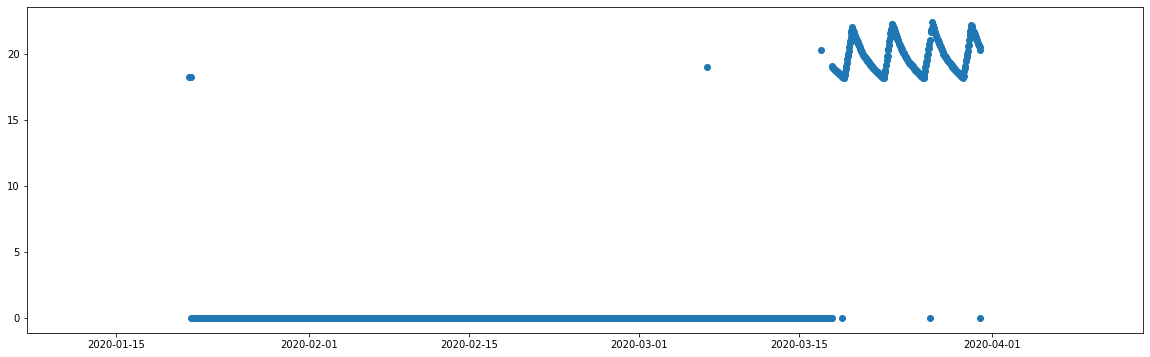

In [36]:
plt.figure(figsize=(20,6))
plt.scatter(data_fit['date'],data_fit['avg'])
# plt.scatter(data_fit['date'],data_fit['max'])
# plt.scatter(data_fit['date'],data_fit['min'])
# plt.legend([PC, line], ['AVG', 'MAX','MIN'])